In [1]:
# Auto reload
%load_ext autoreload
%autoreload 2

In [12]:
import os
import pandas as pd
import yaml
import re
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *

# DATASET: VessMap

In [13]:
vessmap_rnet18_ft_lr_1e2_path = '/media/wesleygalvao/1_TB_LINUX/models_results/03_finetuned/multi_finetune_on_vessmap_resnet18_A_lr_e-2' 
vessmap_rnet18_ft_lr_1e3_path = '/media/wesleygalvao/1_TB_LINUX/models_results/03_finetuned/multi_finetune_on_vessmap_resnet18_A_lr_e-3'
vessmap_rnet18_ft_lr_1e4_path = '/media/wesleygalvao/1_TB_LINUX/models_results/03_finetuned/multi_finetune_on_vessmap_resnet18_A_lr_e-4' 
vessmap_rnet50_ft_lr_1e2_path = '/media/wesleygalvao/1_TB_LINUX/models_results/03_finetuned/multi_finetune_on_vessmap_resnet50_A_lr_e-2' 
vessmap_rnet50_ft_lr_1e3_path = '/media/wesleygalvao/1_TB_LINUX/models_results/03_finetuned/multi_finetune_on_vessmap_resnet50_A_lr_e-3'
vessmap_rnet50_ft_lr_1e4_path = '/media/wesleygalvao/1_TB_LINUX/models_results/03_finetuned/multi_finetune_on_vessmap_resnet50_A_lr_e-4' 
vessmap_rnet50_scratch_path = '/media/wesleygalvao/1_TB_LINUX/models_results/02_trained_from_scratch/multi_train_scratch_on_vessmap_resnet50'
vessmap_rnet18_scratch_path = '/media/wesleygalvao/1_TB_LINUX/models_results/02_trained_from_scratch/multi_train_scratch_on_vessmap_resnet18'
vessmap_zeroshot_path = './zero_shot_inferences'



vessmap_rnet18_ft_lr_1e2 = pd.read_csv(os.path.join(vessmap_rnet18_ft_lr_1e2_path, 'inference_metrics_mean.csv'))
vessmap_rnet18_ft_lr_1e3 = pd.read_csv(os.path.join(vessmap_rnet18_ft_lr_1e3_path, 'inference_metrics_mean.csv'))
vessmap_rnet18_ft_lr_1e4 = pd.read_csv(os.path.join(vessmap_rnet18_ft_lr_1e4_path, 'inference_metrics_mean.csv'))
vessmap_rnet50_ft_lr_1e2 = pd.read_csv(os.path.join(vessmap_rnet50_ft_lr_1e2_path, 'inference_metrics_mean.csv'))
vessmap_rnet50_ft_lr_1e3 = pd.read_csv(os.path.join(vessmap_rnet50_ft_lr_1e3_path, 'inference_metrics_mean.csv'))
vessmap_rnet50_ft_lr_1e4 = pd.read_csv(os.path.join(vessmap_rnet50_ft_lr_1e4_path, 'inference_metrics_mean.csv'))
vessmap_rnet50_scratch = pd.read_csv(os.path.join(vessmap_rnet50_scratch_path, 'inference_metrics_mean.csv'))
vessmap_rnet18_scratch = pd.read_csv(os.path.join(vessmap_rnet18_scratch_path, 'inference_metrics_mean.csv'))
vessmap_rnet_zeroshot = pd.read_csv(os.path.join(vessmap_zeroshot_path, 'zero_shot_inference_results_on_vessmap.csv'))
vessmap_rnet18_zeroshot = vessmap_rnet_zeroshot.loc[vessmap_rnet_zeroshot['model_class']=='resnet18_unet'].copy()
vessmap_rnet50_zeroshot = vessmap_rnet_zeroshot.loc[vessmap_rnet_zeroshot['model_class']=='resnet50_unet'].copy()

vessmap_rnet18_ft_lr_1e2['model_type'] = 'VSUNet18'
vessmap_rnet18_ft_lr_1e3['model_type'] = 'VSUNet18'
vessmap_rnet18_ft_lr_1e4['model_type'] = 'VSUNet18'

vessmap_rnet50_ft_lr_1e2['model_type'] = 'VSUNet50'
vessmap_rnet50_ft_lr_1e3['model_type'] = 'VSUNet50'
vessmap_rnet50_ft_lr_1e4['model_type'] = 'VSUNet50'

vessmap_rnet50_scratch['model_type'] = 'UNet50'
vessmap_rnet18_scratch['model_type'] = 'UNet18'

vessmap_rnet50_zeroshot['model_type'] = 'Zero-Shot VSUNet50'
vessmap_rnet18_zeroshot['model_type'] = 'Zero-Shot VSUNet18'


best_results_vessmap = pd.concat([ 
    vessmap_rnet18_ft_lr_1e2, 
    vessmap_rnet50_ft_lr_1e3, 
    vessmap_rnet50_scratch, 
    vessmap_rnet18_scratch,
    vessmap_rnet50_zeroshot,
    vessmap_rnet18_zeroshot
])


In [14]:
# all_results_vessmap.to_csv('all_inferences_results_on_vessmap.csv', index=False)
best_results_vessmap.to_csv('best_inferences_results_on_vessmap.csv', index=False)

In [15]:
best_results_vessmap.columns

Index(['run_name', 'num_samples', 'wandb_group', 'model_class', 'Accuracy',
       'IoU', 'Precision', 'Recall', 'Dice', 'AUC', 'model_type'],
      dtype='object')

In [16]:
best_results_vessmap_filtered = best_results_vessmap[best_results_vessmap['num_samples'].isin([0, 1, 20])].copy()
vessmap_results_summary = get_experiments_grouped_stats(best_results_vessmap_filtered, [ 'model_type', 'num_samples'], ['Accuracy','IoU', 'Precision', 'Recall', 'Dice', 'AUC'])
vessmap_results_summary.to_csv('vessmap_results_summary.csv', index=False)
vessmap_results_summary


,model_type,num_samples,mean_Accuracy,std_Accuracy,mean_IoU,std_IoU,mean_Precision,std_Precision,mean_Recall,std_Recall,mean_Dice,std_Dice,mean_AUC,std_AUC
0,UNet18,1,0.673897,0.183919,0.361824,0.032106,0.681740,0.203653,0.621889,0.209786,0.488415,0.026990,0.777847,0.066477
1,UNet18,20,0.880254,0.033958,0.645490,0.075045,0.864297,0.044974,0.736974,0.094471,0.769139,0.061523,0.932679,0.019336
2,UNet50,1,0.664788,0.180984,0.343132,0.025390,0.674351,0.205523,0.604377,0.215032,0.466246,0.019827,0.771388,0.061750
3,UNet50,20,0.880176,0.035219,0.652630,0.045748,0.855070,0.040852,0.751827,0.051476,0.775933,0.036949,0.928254,0.019414
4,VSUNet18,1,0.704577,0.204913,0.455015,0.088474,0.675181,0.205135,0.737756,0.148192,0.588988,0.080250,0.851026,0.113033
5,VSUNet18,20,0.900788,0.020991,0.739407,0.017702,0.824574,0.049498,0.887596,0.048252,0.842705,0.013405,0.965329,0.003559
6,VSUNet50,1,0.708357,0.202703,0.438846,0.071218,0.682941,0.207545,0.700313,0.167038,0.568507,0.063337,0.846890,0.084521
7,VSUNet50,20,0.905477,0.025082,0.732344,0.025931,0.850582,0.031699,0.849983,0.027099,0.837478,0.019978,0.961670,0.009116
8,Zero-Shot VSUNet18,0,0.885934,NaN,0.616207,NaN,0.846209,NaN,0.696084,NaN,0.756943,NaN,0.931822,NaN
9,Zero-Shot VSUNet50,0,0.816902,NaN,0.472459,NaN,0.745722,NaN,0.605350,NaN,0.613719,NaN,0.853807,NaN


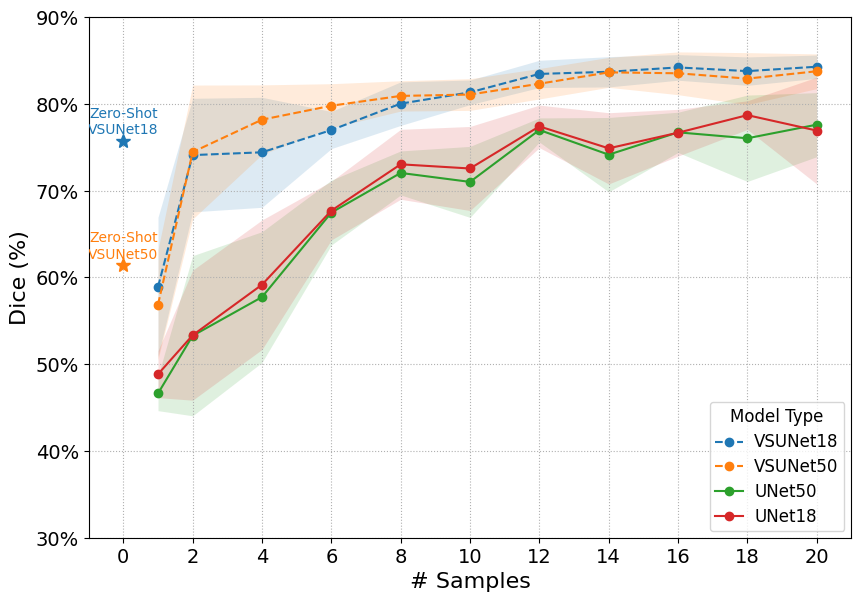

In [24]:
custom_styles = {
    'VSUNet18': '--',
    'VSUNet50': '--',
    'UNet50': '-',
    'UNet18': '-'
}
plot_mean_dice_score(
    best_results_vessmap,
    dataset_name='VessMap',
    hue='model_type',
    x_data='num_samples',
    y_data='Dice',
    percentage=True,
    line_styles=custom_styles,
    annotate_zero_shot=True,
    title='',
    legend_title='Model Type',
    xlabel='# Samples',
    save_path='vessmap_resnet_results.svg',
    font_sizes={
        'title': 16,
        'xlabel': 16,
        'ylabel': 16,
        'xaxis': 14,
        'yaxis': 14,
        'legend': 12,
        'zero_shot_annotation': 10,
        'zero_shot_marker': 10
    },
    figsize=(8.5, 6),
    y_limits=(0.30, 0.90),  # opcional
    legend_loc='lower right',  # exemplos: 'best', 'upper right', 'outside-right', (1.02, 0.5)
    share_zero_shot_color_with='finetuned'
)

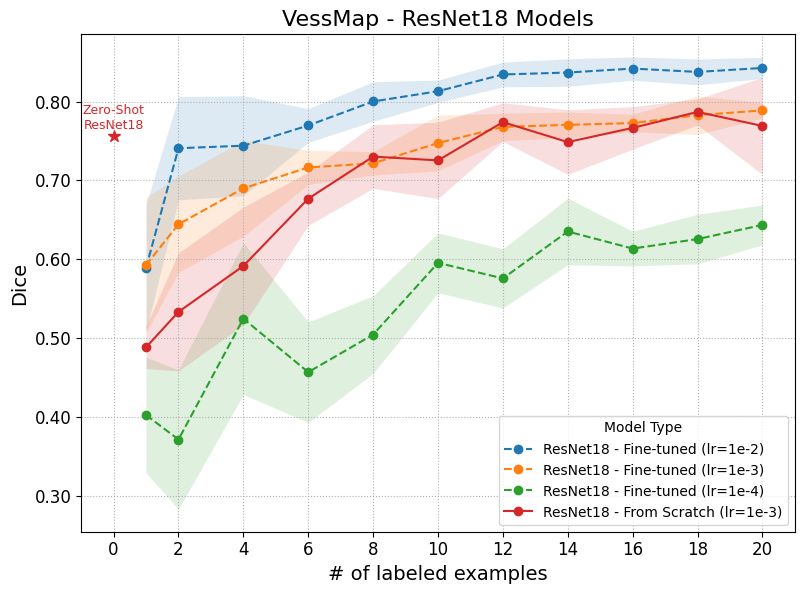

In [34]:
custom_styles = {
    'ResNet18 - Fine-tuned (lr=1e-2)': '--',
    'ResNet18 - Fine-tuned (lr=1e-3)': '--',
    'ResNet18 - Fine-tuned (lr=1e-4)': '--',
    'ResNet18 - Scratch': '-',
}
plot_mean_dice_score(
    all_resnet18_vessmap,
    dataset_name='VessMap',
    hue='model_type',
    x_data='num_samples',
    y_data='Dice',
    line_styles=custom_styles,
    annotate_zero_shot=True,
    title='VessMap - ResNet18 Models',
    legend_title='Model Type',
    save_path='vessmap_resnet_results.png',
    font_sizes={
        'title': 16,
        'xlabel': 14,
        'ylabel': 14,
        'xaxis': 12,
        'yaxis': 12,
        'legend': 10,
        'zero_shot_annotation': 9,
        'zero_shot_marker': 9
    },
    figsize=(8, 6)
)

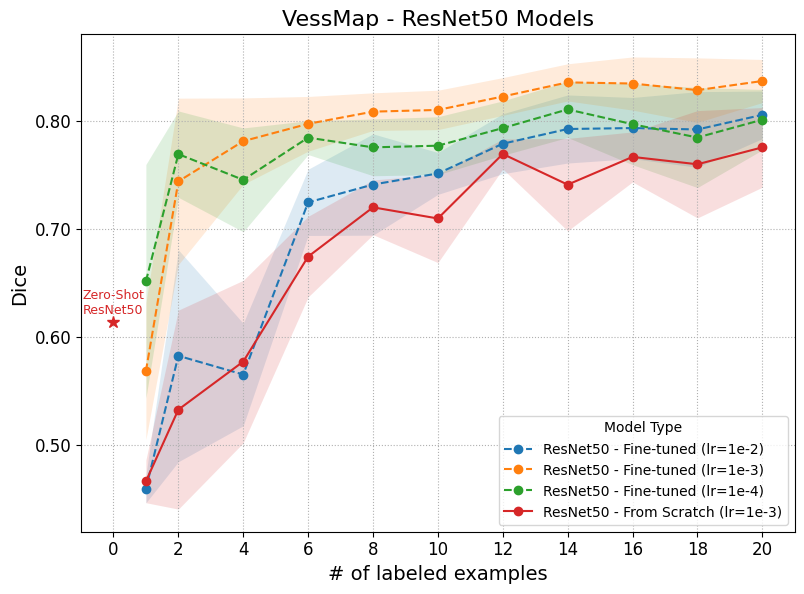

In [35]:
custom_styles = {
    'ResNet50 - Fine-tuned (lr=1e-2)': '--',
    'ResNet50 - Fine-tuned (lr=1e-3)': '--',
    'ResNet50 - Fine-tuned (lr=1e-4)': '--',
    'ResNet50 - Scratch': '-'
}
plot_mean_dice_score(
    all_resnet50_vessmap,
    dataset_name='VessMap',
    hue='model_type',
    x_data='num_samples',
    y_data='Dice',
    line_styles=custom_styles,
    annotate_zero_shot=True,
    title='VessMap - ResNet50 Models',
    legend_title='Model Type',
    save_path='vessmap_resnet_results.png',
    font_sizes={
        'title': 16,
        'xlabel': 14,
        'ylabel': 14,
        'xaxis': 12,
        'yaxis': 12,
        'legend': 10,
        'zero_shot_annotation': 9,
        'zero_shot_marker': 9
    },
    figsize=(8, 6)
)

In [ ]:
#plot_mean_dice_score_px(all_results_vessmap, dataset_name='VessMap', hue='model_type', x_data='num_samples', y_data='Dice', line_styles=custom_styles)

# DATASET: Drive

In [5]:
drive_rnet50_ft_lr_1e2_path = '/media/wesleygalvao/1_TB_LINUX/models_results/03_finetuned/multi_finetune_on_drive_resnet50_A_lr_e-2'
drive_rnet18_ft_lr_1e2_path = '/media/wesleygalvao/1_TB_LINUX/models_results/03_finetuned/multi_finetune_on_drive_resnet18_A_lr_e-2'
drive_rnet50_ft_lr_1e3_path = '/media/wesleygalvao/1_TB_LINUX/models_results/03_finetuned/multi_finetune_on_drive_resnet50_A_lr_e-3'
drive_rnet18_ft_lr_1e3_path = '/media/wesleygalvao/1_TB_LINUX/models_results/03_finetuned/multi_finetune_on_drive_resnet18_A_lr_e-3'
drive_rnet50_scratch_path = '/media/wesleygalvao/1_TB_LINUX/models_results/02_trained_from_scratch/multi_train_scratch_on_drive_resnet50'
drive_rnet18_scratch_path = '/media/wesleygalvao/1_TB_LINUX/models_results/02_trained_from_scratch/multi_train_scratch_on_drive_resnet18'
drive_zeroshot_path = './zero_shot_inferences'

drive_rnet50_ft_lr_1e2 = pd.read_csv(os.path.join(drive_rnet50_ft_lr_1e2_path, 'inference_metrics_mean.csv'))
drive_rnet18_ft_lr_1e2 = pd.read_csv(os.path.join(drive_rnet18_ft_lr_1e2_path, 'inference_metrics_mean.csv'))
drive_rnet50_ft_lr_1e3 = pd.read_csv(os.path.join(drive_rnet50_ft_lr_1e3_path, 'inference_metrics_mean.csv'))
drive_rnet18_ft_lr_1e3 = pd.read_csv(os.path.join(drive_rnet18_ft_lr_1e3_path, 'inference_metrics_mean.csv'))
drive_rnet50_scratch = pd.read_csv(os.path.join(drive_rnet50_scratch_path, 'inference_metrics_mean.csv'))
drive_rnet18_scratch = pd.read_csv(os.path.join(drive_rnet18_scratch_path, 'inference_metrics_mean.csv'))
drive_zeroshot = pd.read_csv(os.path.join(drive_zeroshot_path, 'zero_shot_inference_results_on_drive.csv'))

drive_rnet18_zeroshot = drive_zeroshot.loc[drive_zeroshot['model_class']=='resnet18_unet'].copy()
drive_rnet50_zeroshot = drive_zeroshot.loc[drive_zeroshot['model_class']=='resnet50_unet'].copy()


drive_rnet50_ft_lr_1e3['model_type'] = 'VSUNet50'
drive_rnet18_ft_lr_1e3['model_type'] = 'VSUNet18'
drive_rnet50_ft_lr_1e2['model_type'] = 'VSUNet50'
drive_rnet18_ft_lr_1e2['model_type'] = 'VSUNet18'
drive_rnet50_scratch['model_type'] = 'UNet50'
drive_rnet18_scratch['model_type'] = 'UNet18'
drive_rnet50_zeroshot['model_type'] = 'Zero-Shot VSUNet50'
drive_rnet18_zeroshot['model_type'] = 'Zero-Shot VSUNet18'

all_results_drive = pd.concat([drive_rnet50_ft_lr_1e3, drive_rnet18_ft_lr_1e3, drive_rnet50_ft_lr_1e2, drive_rnet18_ft_lr_1e2, drive_rnet50_scratch, drive_rnet18_scratch, drive_rnet50_zeroshot, drive_rnet18_zeroshot])
best_results_drive = pd.concat([
    drive_rnet50_ft_lr_1e3,
    drive_rnet18_ft_lr_1e2,
    drive_rnet50_scratch,
    drive_rnet18_scratch,
    drive_rnet50_zeroshot,
    drive_rnet18_zeroshot
])

In [6]:
all_results_drive.to_csv('all_inferences_results_on_drive.csv', index=False)
best_results_drive.to_csv('best_inferences_results_on_drive.csv', index=False)

In [7]:
best_results_drive_filtered = best_results_drive[best_results_drive['num_samples'].isin([0, 1, 16])].copy()
drive_results_summary = get_experiments_grouped_stats(best_results_drive_filtered, [ 'model_type', 'num_samples'], ['Accuracy','IoU', 'Precision', 'Recall', 'Dice', 'AUC'])
drive_results_summary.to_csv('drive_results_summary.csv', index=False)
drive_results_summary


,model_type,num_samples,mean_Accuracy,std_Accuracy,mean_IoU,std_IoU,mean_Precision,std_Precision,mean_Recall,std_Recall,mean_Dice,std_Dice,mean_AUC,std_AUC
0,UNet18,1,0.919251,0.015508,0.522965,0.058463,0.716767,0.079309,0.689587,0.118090,0.681873,0.053525,0.914068,0.025120
1,UNet18,16,0.946079,0.000819,0.646999,0.003801,0.795218,0.005347,0.780539,0.004070,0.785367,0.002817,0.956675,0.001905
2,UNet50,1,0.916473,0.030624,0.522583,0.050320,0.722053,0.098805,0.689676,0.110488,0.681296,0.046389,0.912626,0.024439
3,UNet50,16,0.947246,0.000619,0.650052,0.002344,0.806999,0.005689,0.774018,0.003772,0.787649,0.001721,0.959271,0.001440
4,VSUNet18,1,0.940617,0.002187,0.612189,0.008571,0.786537,0.021052,0.740827,0.019314,0.758933,0.006608,0.948815,0.004673
5,VSUNet18,16,0.949901,0.000227,0.658299,0.000437,0.833417,0.003741,0.762319,0.002717,0.793667,0.000328,0.966583,0.000394
6,VSUNet50,1,0.938892,0.005720,0.610605,0.015878,0.773288,0.046444,0.754053,0.038690,0.757385,0.012581,0.949937,0.005509
7,VSUNet50,16,0.951596,0.000104,0.665829,0.001098,0.845708,0.002946,0.762196,0.003521,0.799103,0.000814,0.970010,0.000430
8,Zero-Shot VSUNet18,0,0.906580,NaN,0.489691,NaN,0.628713,NaN,0.698552,NaN,0.656128,NaN,0.891149,NaN
9,Zero-Shot VSUNet50,0,0.888205,NaN,0.230270,NaN,0.728015,NaN,0.275236,NaN,0.366557,NaN,0.761769,NaN


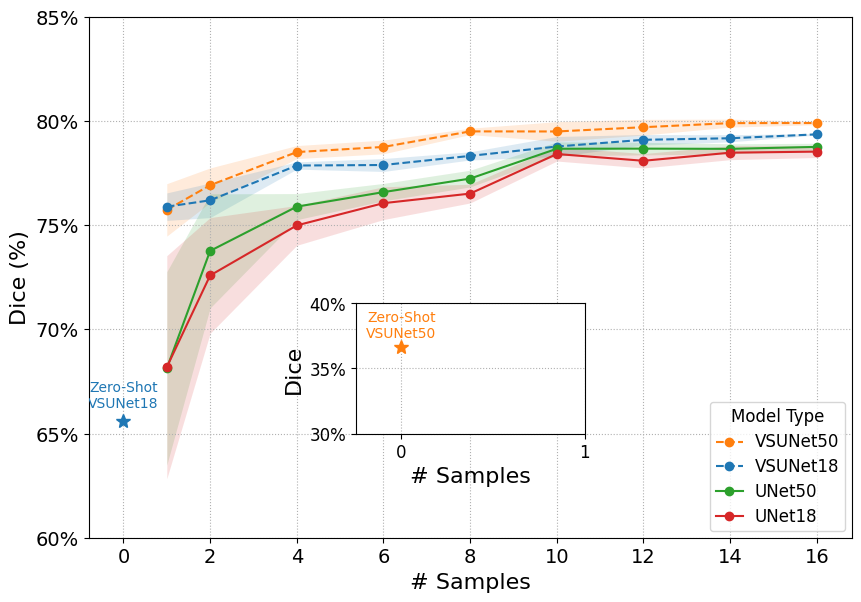

In [25]:
custom_styles = {
    'VSUNet18': '--',
    'VSUNet50': '--',
    'UNet50': '-',
    'UNet18': '-'
}

plot_mean_dice_score(
    best_results_drive,
    dataset_name='Drive',
    hue='model_type',
    x_data='num_samples',
    y_data='Dice',
    line_styles=custom_styles,
    annotate_zero_shot=True,
    title='',
    percentage=True,
    legend_title='Model Type',
    xlabel='# Samples',
    save_path='drive_resnet_results.svg',
    font_sizes={
        'title': 16,
        'xlabel': 16,
        'ylabel': 16,
        'xaxis': 14,
        'yaxis': 14,
        'legend': 12,
        'zero_shot_annotation': 10,
        'zero_shot_marker': 10,
        'inset_xaxis': 12,
        'inset_yaxis': 12
    },
    figsize=(8.5, 6),
    y_limits=(0.60, 0.85),  # opcional
    legend_loc='lower right',
    inset_enabled=True,
    inset_x_limits=(0, 1),
    inset_x_integer_ticks=True,
    inset_y_limits=(0.30, 0.40),
    share_zero_shot_color_with='finetuned',
    inset_loc='lower center',  # ajuste de localização do inset, se desejar
    inset_borderpad=3,
    inset_zero_shift_frac=0.20,
    inset_size=(0.30, 0.25),
    inset_bbox=(0.35, 0.20, 0.3, 0.25),
    inset_show_axis_labels=True

)

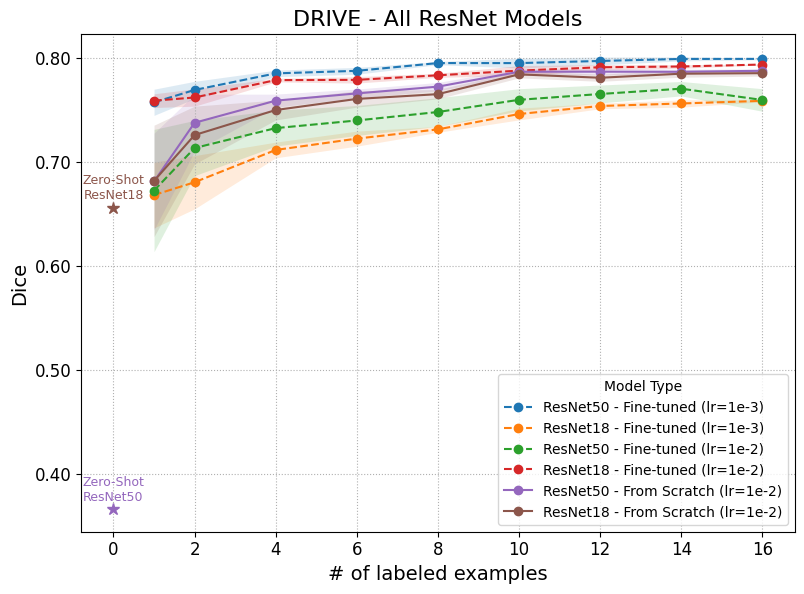

In [ ]:
custom_styles = {
    'ResNet50 - Fine-tuned (lr=1e-3)': '--',
    'ResNet18 - Fine-tuned (lr=1e-3)': '--',
    'ResNet50 - Fine-tuned (lr=1e-2)': '--',
    'ResNet18 - Fine-tuned (lr=1e-2)': '--',
    'ResNet50 - From Scratch': '-',
    'ResNet18 - From Scratch': '-'
}
plot_mean_dice_score(
    all_results_drive,
    dataset_name='Drive',
    hue='model_type',
    x_data='num_samples',
    y_data='Dice',
    line_styles=custom_styles,
    annotate_zero_shot=True,
    title='DRIVE - All ResNet Models',
    legend_title='Model Type',
    save_path='drive_resnet_results.svg',
    font_sizes={
        'title': 16,
        'xlabel': 14,
        'ylabel': 14,
        'xaxis': 12,
        'yaxis': 12,
        'legend': 10,
        'zero_shot_annotation': 9,
        'zero_shot_marker': 9
    },
    figsize=(8, 6),
    # y_limits=(0.0, 1.0),  # opcional
    # legend_loc='outside-right'  # opcional; ex.: 'best', 'upper right', 'outside-right', (1.02, 0.5)
)

Testar o Inset Plot
https://matplotlib.org/stable/gallery/axes_grid1/inset_locator_demo.html
https://stackoverflow.com/questions/55479414/how-to-embed-inset-plots-generated-with-seaborn-lmplot

# Models trained on VessMap from Scratch vs Models pre-trained on Vess-Shape and then fine-tuned on VessMap

In [ ]:
custom_styles = {
    'ResNet50 - Fine-tuned (lr=1e-3)': '--',
    'ResNet18 - Fine-tuned (lr=1e-2)': '--',
    'ResNet50 - From Scratch': '-',
    'ResNet18 - From Scratch': '-'
}
plot_mean_dice_score(
    best_results_drive,
    dataset_name='Drive',
    hue='model_type',
    x_data='num_samples',
    y_data='Dice',
    line_styles=custom_styles,
    annotate_zero_shot=True,
    title='',
    legend_title='Model Type',
    save_path='drive_resnet_results.svg',
    font_sizes={
        'title': 16,
        'xlabel': 16,
        'ylabel': 16,
        'xaxis': 14,
        'yaxis': 14,
        'legend': 12,
        'zero_shot_annotation': 10,
        'zero_shot_marker': 10
    },
    figsize=(8.5, 6),
    y_limits=(0.35, 0.85),  # opcional
    legend_loc='lower right',
    inset_enabled=True,
    inset_x_limits=(0, 1),
    inset_y_limits=(0.30, 0.40),
    share_zero_shot_color_with='finetuned'
 )

In [5]:
all_stats_grouped_by_samples_vessmap

,model_class,samples,wandb_group,mean_Dice,median_Dice,std_Dice,model_type
0,resnet50_unet,20,resnet50_unet | lr:0.001 | weights_id:FromScra...,0.871863,0.871275,0.004024,resnet50_unet_scratch
1,resnet50_unet,18,resnet50_unet | lr:0.001 | weights_id:FromScra...,0.853072,0.854691,0.020353,resnet50_unet_scratch
2,resnet50_unet,16,resnet50_unet | lr:0.001 | weights_id:FromScra...,0.849404,0.849017,0.012170,resnet50_unet_scratch
3,resnet50_unet,14,resnet50_unet | lr:0.001 | weights_id:FromScra...,0.846193,0.855451,0.017514,resnet50_unet_scratch
4,resnet50_unet,12,resnet50_unet | lr:0.001 | weights_id:FromScra...,0.835322,0.834844,0.012630,resnet50_unet_scratch
5,resnet50_unet,10,resnet50_unet | lr:0.001 | weights_id:FromScra...,0.830737,0.829197,0.012525,resnet50_unet_scratch
6,resnet50_unet,8,resnet50_unet | lr:0.001 | weights_id:FromScra...,0.744821,0.749681,0.018131,resnet50_unet_scratch
7,resnet50_unet,6,resnet50_unet | lr:0.001 | weights_id:FromScra...,0.718152,0.713293,0.056637,resnet50_unet_scratch
8,resnet50_unet,4,resnet50_unet | lr:0.001 | weights_id:FromScra...,0.626603,0.602814,0.097633,resnet50_unet_scratch
9,resnet50_unet,2,resnet50_unet | lr:0.001 | weights_id:FromScra...,0.670723,0.671522,0.036687,resnet50_unet_scratch


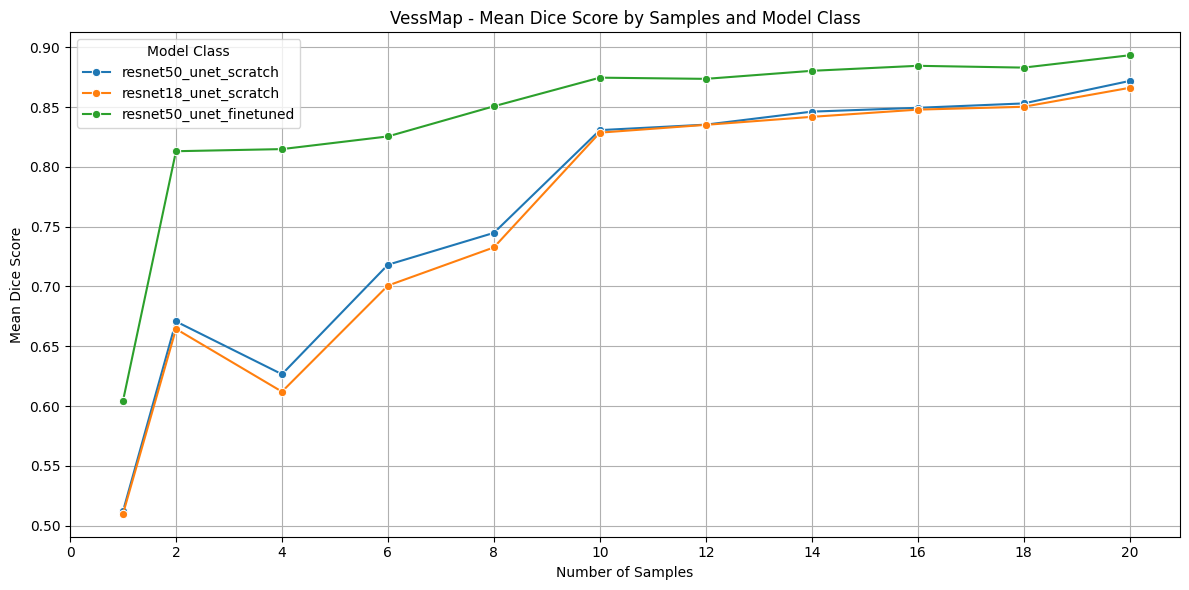

In [10]:
plot_mean_dice_score(all_stats_grouped_by_samples_vessmap, dataset_name='VessMap')

# Models trained on VessMap from Scratch vs Models pre-trained on Vess-Shape and then fine-tuned on DRIVE

In [7]:
resnet50_finetuned_path = '/media/wesleygalvao/1_TB_LINUX/models_results/03_finetuned/multi_finetune_on_drive_resnet50_A'
resnet18_finetuned_path = '/media/wesleygalvao/1_TB_LINUX/models_results/03_finetuned/multi_finetune_on_drive_resnet18_A'
resnet18_from_scratch_path = '/media/wesleygalvao/1_TB_LINUX/models_results/02_trained_from_scratch/multi_train_scratch_on_drive_resnet18_2'
resnet50_from_scratch_path = '/media/wesleygalvao/1_TB_LINUX/models_results/02_trained_from_scratch/multi_train_scratch_on_drive_resnet50_2'


resnet50_finetuned_results = get_experiments_raw_stats(resnet50_finetuned_path)
resnet18_finetuned_results = get_experiments_raw_stats(resnet18_finetuned_path)
resnet50_scratch_results = get_experiments_raw_stats(resnet50_from_scratch_path)
resnet18_scratch_results = get_experiments_raw_stats(resnet18_from_scratch_path)

resnet50_scratch_grouped_run = get_experiments_grouped_stats(resnet50_scratch_results, ['model_class', 'samples', 'wandb_group', 'run'], 'Dice', ['mean', 'median', 'std'])
resnet18_scratch_grouped_run = get_experiments_grouped_stats(resnet18_scratch_results, ['model_class', 'samples', 'wandb_group', 'run'], 'Dice', ['mean', 'median', 'std'])
resnet50_finetuned_grouped_run = get_experiments_grouped_stats(resnet50_finetuned_results, ['model_class', 'samples', 'wandb_group', 'run'], 'Dice', ['mean', 'median', 'std'])
resnet18_finetuned_grouped_run = get_experiments_grouped_stats(resnet18_finetuned_results, ['model_class', 'samples', 'wandb_group', 'run'], 'Dice', ['mean', 'median', 'std'])

resnet50_scratch_grouped_samples = get_experiments_grouped_stats(resnet50_scratch_grouped_run, ['model_class', 'samples', 'wandb_group'], 'mean_Dice', ['mean', 'median', 'std'])
resnet18_scratch_grouped_samples = get_experiments_grouped_stats(resnet18_scratch_grouped_run, ['model_class', 'samples', 'wandb_group'], 'mean_Dice', ['mean', 'median', 'std'])
resnet50_finetuned_grouped_samples = get_experiments_grouped_stats(resnet50_finetuned_grouped_run, ['model_class', 'samples', 'wandb_group'], 'mean_Dice', ['mean', 'median', 'std'])
resnet18_finetuned_grouped_samples = get_experiments_grouped_stats(resnet18_finetuned_grouped_run, ['model_class', 'samples', 'wandb_group'], 'mean_Dice', ['mean', 'median', 'std'])

resnet50_scratch_grouped_samples['model_type'] = resnet50_scratch_grouped_samples['model_class'] + '_scratch'
resnet18_scratch_grouped_samples['model_type'] = resnet18_scratch_grouped_samples['model_class'] + '_scratch'
resnet50_finetuned_grouped_samples['model_type'] = resnet50_finetuned_grouped_samples['model_class'] + '_finetuned'
resnet18_finetuned_grouped_samples['model_type'] = resnet18_finetuned_grouped_samples['model_class'] + '_finetuned'

all_stats_grouped_by_samples_drive = pd.concat([resnet50_scratch_grouped_samples, resnet18_scratch_grouped_samples, resnet50_finetuned_grouped_samples, resnet18_finetuned_grouped_samples])


In [8]:
all_stats_grouped_by_samples_drive

,model_class,samples,wandb_group,mean_Dice,median_Dice,std_Dice,model_type
0,resnet50_unet,16,resnet50_unet | lr:0.01 | weights_id:FromScrat...,0.736461,0.736214,0.003491,resnet50_unet_scratch
1,resnet50_unet,14,resnet50_unet | lr:0.01 | weights_id:FromScrat...,0.716017,0.710853,0.010875,resnet50_unet_scratch
2,resnet50_unet,12,resnet50_unet | lr:0.01 | weights_id:FromScrat...,0.719943,0.718984,0.009442,resnet50_unet_scratch
3,resnet50_unet,10,resnet50_unet | lr:0.01 | weights_id:FromScrat...,0.701643,0.696320,0.013735,resnet50_unet_scratch
4,resnet50_unet,8,resnet50_unet | lr:0.01 | weights_id:FromScrat...,0.679138,0.679198,0.009406,resnet50_unet_scratch
5,resnet50_unet,6,resnet50_unet | lr:0.01 | weights_id:FromScrat...,0.668975,0.670203,0.015079,resnet50_unet_scratch
6,resnet50_unet,4,resnet50_unet | lr:0.01 | weights_id:FromScrat...,0.657865,0.656679,0.016773,resnet50_unet_scratch
7,resnet50_unet,2,resnet50_unet | lr:0.01 | weights_id:FromScrat...,0.622621,0.640609,0.035106,resnet50_unet_scratch
8,resnet50_unet,1,resnet50_unet | lr:0.01 | weights_id:FromScrat...,0.585349,0.574332,0.037306,resnet50_unet_scratch
0,resnet18_unet,16,resnet18_unet | lr:0.01 | weights_id:FromScrat...,0.738824,0.739249,0.002224,resnet18_unet_scratch


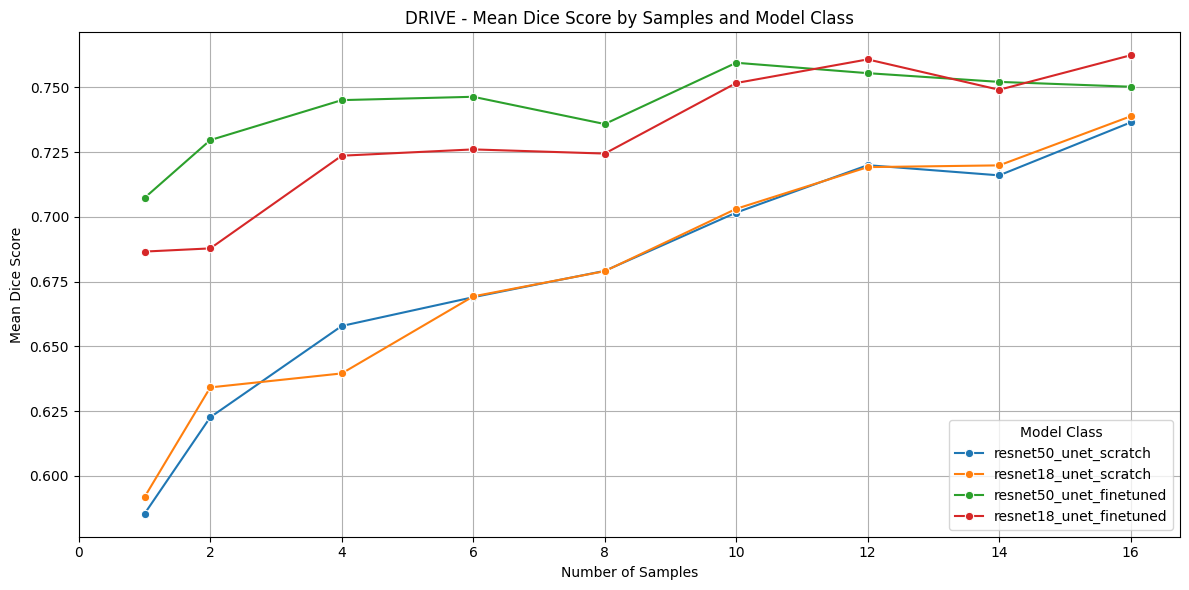

In [9]:
plot_mean_dice_score(all_stats_grouped_by_samples_drive, dataset_name='DRIVE')